#Trying out do Bio Phylo related tools
---

##Download and load assembly data in Nexus aligned format

In [1]:
import subprocess
subprocess.call(['wget','http://www.nature.com/nature/journal/vaop/ncurrent/extref/nature14594-s2.txt'])
from Bio import AlignIO
aln = AlignIO.read('nature14594-s2.txt', 'nexus')

##Build tree

In [2]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

In [3]:
calculator = DistanceCalculator('identity')
constructor = DistanceTreeConstructor(calculator, 'nj')

import time
start=time.time()
#tree = constructor.build_tree(aln)
print 'It took: ', time.time()-start,'s'

It took:  3914.79623008 s


In [4]:
tree=Phylo.read('ebola_phylo','newick')

###Color nodes

In [5]:
col_dict=dict({'GUI':'green','SLE':'blue',
               'SLe':'blue','LIB':'magenta','X':'grey',
              'DPR2':'yellow','DPR1':'red'})
for clade in tree.find_clades():
    if(len(clade.name.split('_')) > 1): #leaves
        clade.color=col_dict[clade.name.split('_')[4]]
    else: #internal branches
        clade.color='grey'

##Plot in tree view

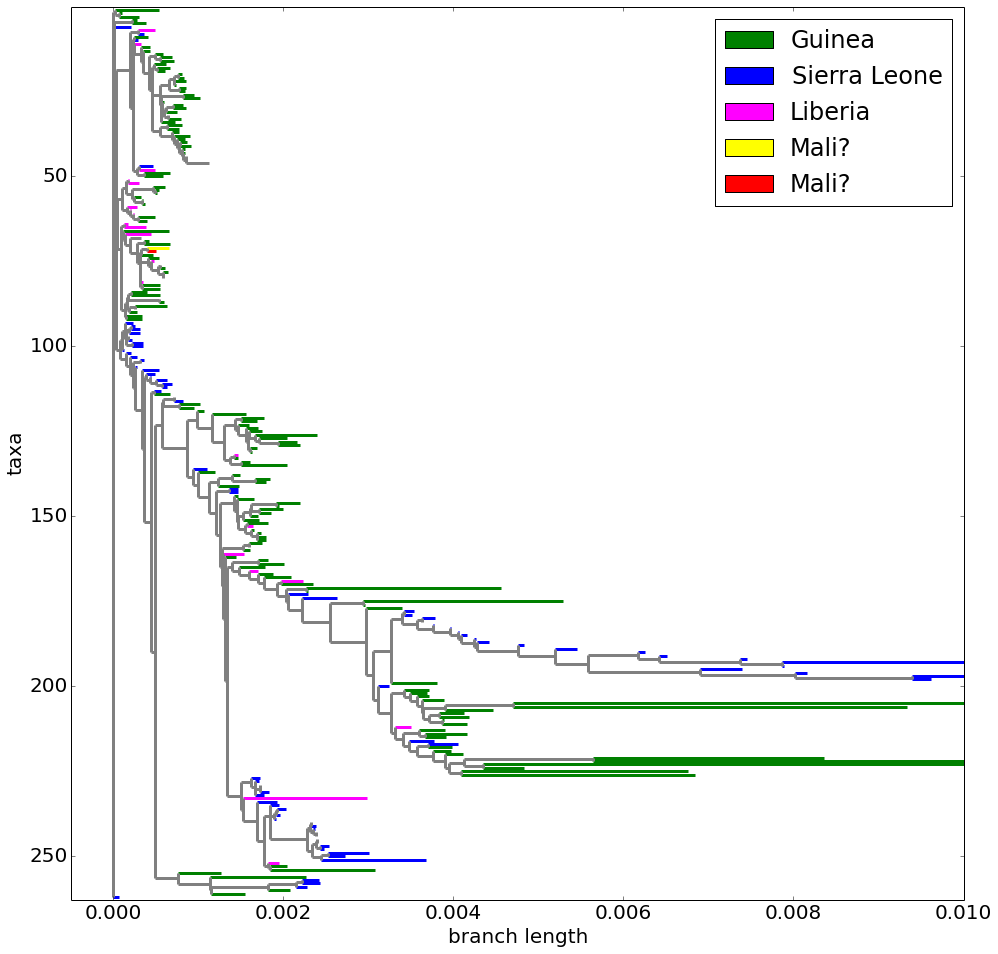

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#some settings
matplotlib.rc('font', size=20)
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['figure.figsize'] =(16,16) 

fig,ax=plt.subplots()
#custom legend
gui_proxy = plt.Rectangle((0, 0), 1, 1, fc="green")
sle_proxy = plt.Rectangle((0, 0), 1, 1, fc="blue")
lib_proxy = plt.Rectangle((0, 0), 1, 1, fc="magenta")
dpr2_proxy = plt.Rectangle((0, 0), 1, 1, fc="yellow")
dpr1_proxy = plt.Rectangle((0, 0), 1, 1, fc="red")
ax.legend([gui_proxy,sle_proxy,lib_proxy,dpr2_proxy,dpr1_proxy],
          ['Guinea','Sierra Leone','Liberia','Mali?','Mali?'])

#draw tree
def my_label(clade):
        return None
Phylo.draw(tree,my_label,axes=ax,xlim=(-0.0005,0.01))


---
##Copy tree to networkx graph

In [7]:
import copy
import networkx as nx
newtree=copy.deepcopy(tree)
g=Phylo.to_networkx(newtree)

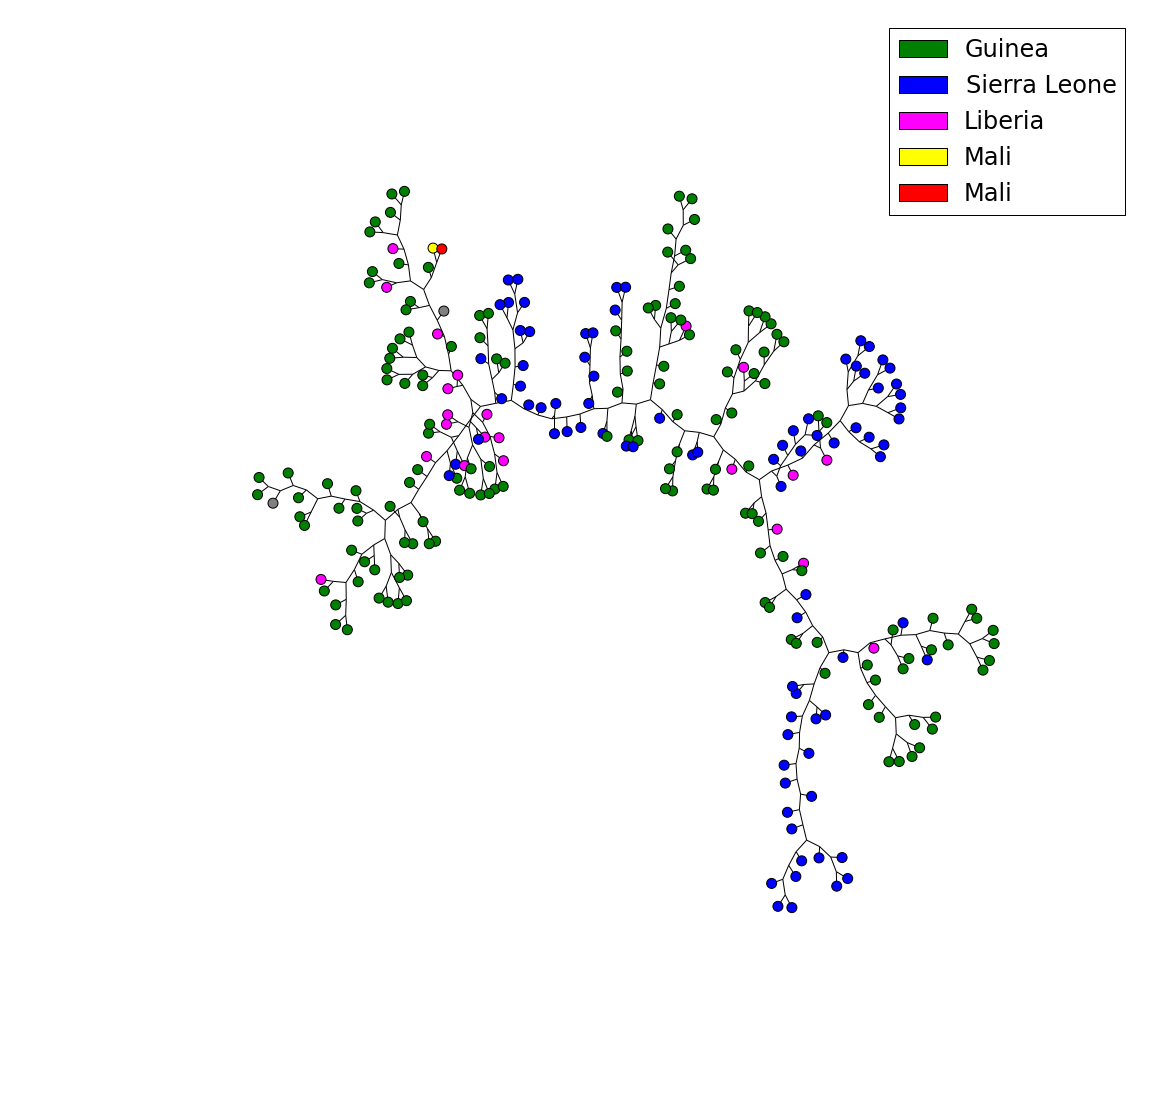

In [8]:
#color 
col_dict=dict({'GUI':'green','SLE':'blue',
               'SLe':'blue','LIB':'magenta','X':'grey',
              'DPR2':'yellow','DPR1':'red'})
cols,node_size=[],[]
for node in g.nodes():
    if(len(node.name.split('_')) > 1): #leaves
        cols.append(col_dict[node.name.split('_')[4]])
        node_size.append(100)
    else: #internal branches
        cols.append('grey')
        node_size.append(0)

#plot
fig,ax=plt.subplots()
fig.tight_layout()
nx.draw_graphviz(g,with_labels=False,node_size=node_size,node_color=cols)

#custom legend
gui_proxy = plt.Rectangle((0, 0), 1, 1, fc="green")
sle_proxy = plt.Rectangle((0, 0), 1, 1, fc="blue")
lib_proxy = plt.Rectangle((0, 0), 1, 1, fc="magenta")
dpr2_proxy = plt.Rectangle((0, 0), 1, 1, fc="yellow")
dpr1_proxy = plt.Rectangle((0, 0), 1, 1, fc="red")
ax.legend([gui_proxy,sle_proxy,lib_proxy,dpr2_proxy,dpr1_proxy],
          ['Guinea','Sierra Leone','Liberia','Mali','Mali'],
         loc='best')

##Plot the same with districts

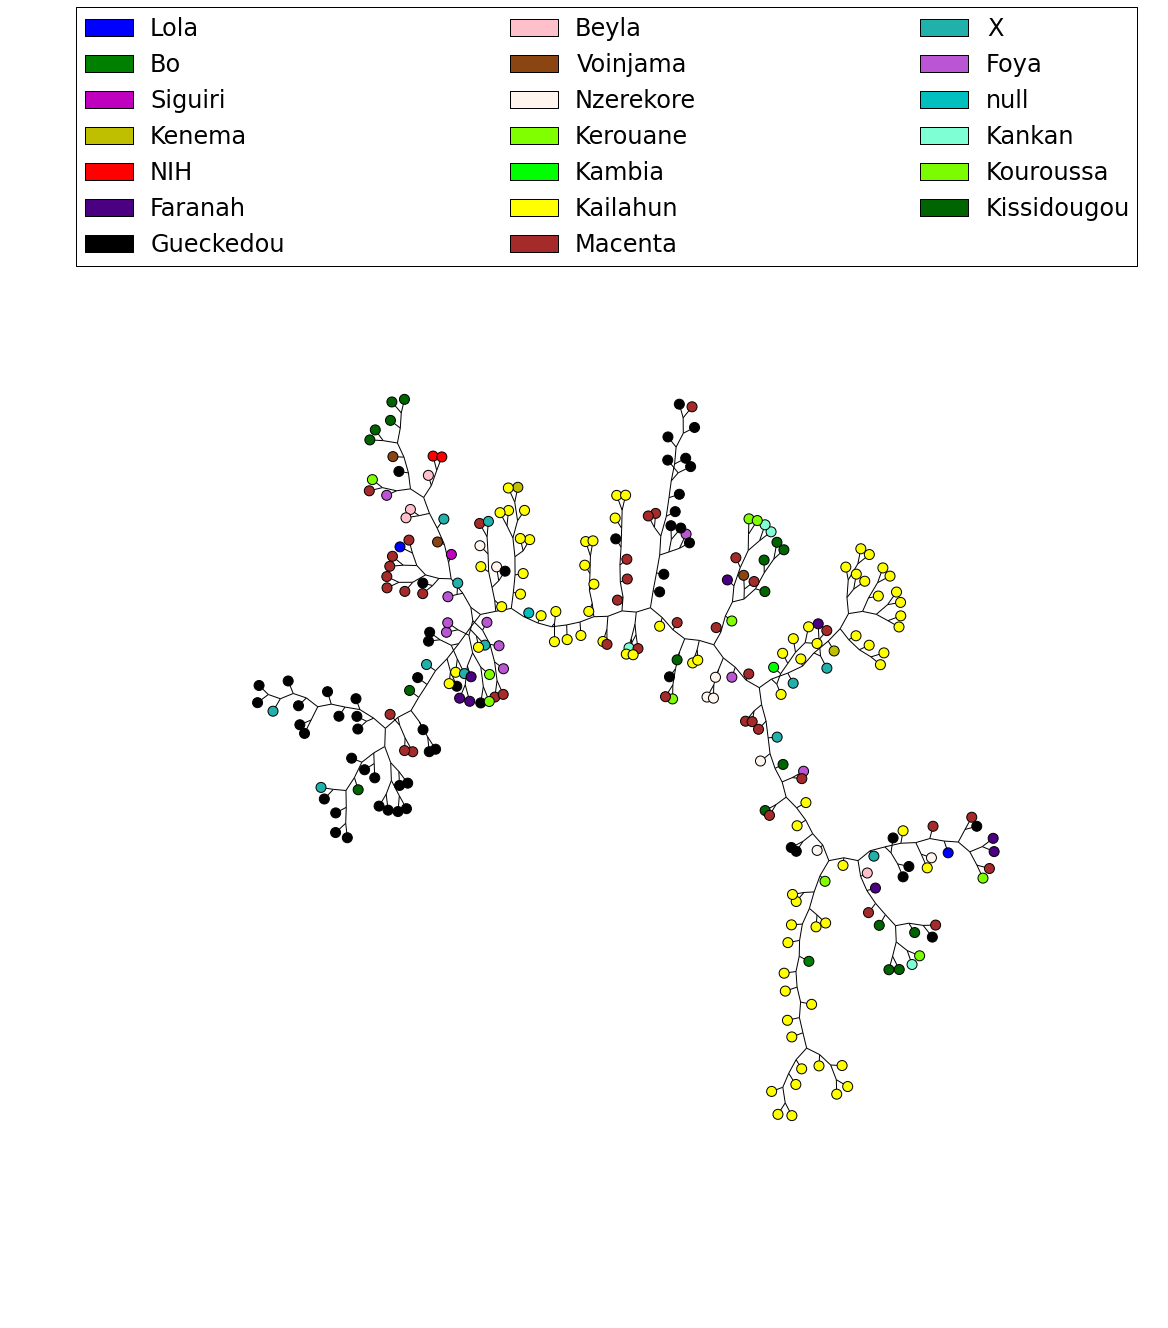

In [9]:
#color
from matplotlib import colors

#collect labels
districts=set()
for node in g.nodes():
    if(len(node.name.split('_')) > 1 ):
        districts.add(node.name.split('_')[5])

#color
my_colors=['b','g','r','c','m','y','k']+colors.cnames.keys()[::5]
distr_colors=dict()
i=0
for dist in districts:
    distr_colors[dist]=my_colors[i%len(my_colors)]
    i+=1
    
cols,node_size=[],[]
for node in g.nodes():
    if(len(node.name.split('_')) > 1): #leaves
        cols.append(distr_colors[node.name.split('_')[5]])
        node_size.append(100)
    else: #internal branches
        cols.append('grey')
        node_size.append(0)
        
#plot
fig,ax=plt.subplots()
fig.tight_layout()
nx.draw_graphviz(g,with_labels=False,node_size=node_size,node_color=cols)

#custom legend
proxies=[]
for dist in distr_colors.keys():
    proxies.append(plt.Rectangle((0, 0), 1, 1, fc=distr_colors[dist]))
ax.legend(proxies,distr_colors.keys(),
           bbox_to_anchor=(0., 1.1, 1., .102), ncol=3,
          mode="expand", borderaxespad=0.)

##Plot with the date of month

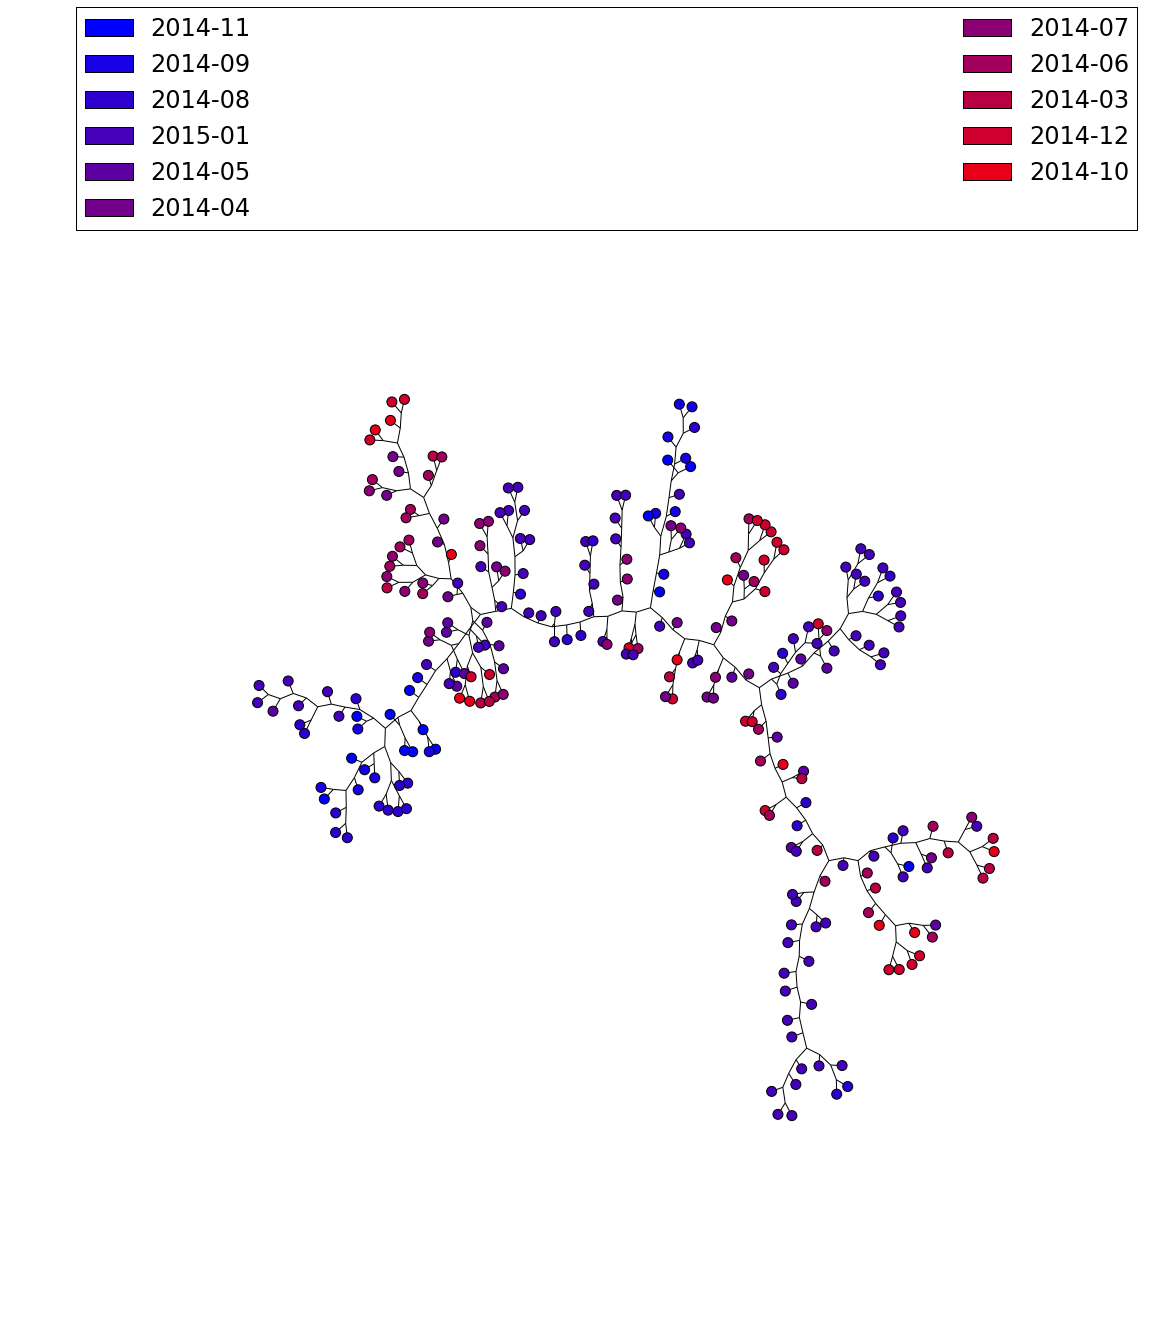

In [13]:
#collect labels
dates=set()
for node in g.nodes():
    if(len(node.name.split('_')) > 1 ):
        dates.add('-'.join(node.name.split('_')[-3:-1]))

#color
date_colors=dict([ [sorted(dates)[i],'#%02X%02X%02X' % 
                    (255*i/float(len(dates)),0,255-255*i/float(len(dates)))] for i in xrange(len(dates)) ])

cols,node_size=[],[]
for node in g.nodes():
    if(len(node.name.split('_')) > 1): #leaves
        cols.append(date_colors['-'.join(node.name.split('_')[-3:-1])])
        node_size.append(100)
    else: #internal branches
        cols.append('grey')
        node_size.append(0)

#plot        
fig,ax=plt.subplots()
fig.tight_layout()
nx.draw_graphviz(g,with_labels=False,node_size=node_size,node_color=cols)

#custom legend
proxies=[]
for date in sorted(date_colors.keys()):
    proxies.append(plt.Rectangle((0, 0), 1, 1, fc=date_colors[date]))
ax.legend(proxies,date_colors.keys(),
           bbox_to_anchor=(0., 1.1, 1., .102), ncol=2,
          mode="expand", borderaxespad=0.)

---
#Write out the tree

In [11]:
Phylo.write(tree,'ebola_phylo','newick')

1